<a href="https://colab.research.google.com/github/Rijan-Ja-Bhattarai/AI/blob/main/Exercise2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.9.0+cu126'

# Device Agnostic Code

In [67]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create The Dataset

In [68]:
# Create Known Parameters
weight = 0.3
bias = 0.9

start = 1.
end = 5.
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

In [69]:
# Split the dataset
print(f"Total Dataset Size: {X.shape}")
train_split = int(0.8 * len(X))

X_train = X[:train_split]
y_train = y[:train_split]

X_test = X[train_split: ]
y_test = y[train_split: ]

Total Dataset Size: torch.Size([400, 1])


In [70]:
print(f"Shape of train set: {X_train.shape}")
print(f"Shape of train set: {y_train.shape}")
print(f"Shape of train set: {X_test.shape}")
print(f"Shape of train set: {y_test.shape}")

Shape of train set: torch.Size([320, 1])
Shape of train set: torch.Size([320, 1])
Shape of train set: torch.Size([80, 1])
Shape of train set: torch.Size([80, 1])


# Visualize Function

In [127]:
def plot_prediction(train_set = X_train.cpu().numpy(),
                    train_label = y_train.cpu().numpy(),
                    test_set = X_test.cpu().numpy(),
                    test_label = y_test.cpu().numpy(),
                    prediction = None):
  plt.figure(figsize = (10, 7))

  plt.scatter(train_set, train_label, c = "blue", s = 5,   label = "Training Set")
  plt.scatter(test_set, test_label, c = "red", s = 5,   label = "Testing Set")

  if prediction is not None:
    plt.ylim(0, 6)
    plt.grid(visible=True)
    plt.scatter(test_set, prediction, c = "green", s = 5, label =  "Prediction Set")

# Build the Model

In [72]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features= 1,
                                  out_features= 1,
                                  bias = True)
  def forward(self, X : torch.Tensor) -> torch.Tensor:
    return self.linear_layer(X)

# Manual Seed for Weights and Bias
torch.cuda.manual_seed(42)

# Instance of The Model
model = LinearRegressionModel()
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5964]])),
             ('linear_layer.bias', tensor([0.8334]))])

In [73]:
model.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

# Train The Model

In [74]:
# Loss Function
Loss_fn = nn.L1Loss()

# Optimizer
Optimizer = torch.optim.SGD(model.parameters(),
                            lr = 0.01)

In [121]:
epoch_values = []
test_loss = []
loss_values = []

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

epochs = 3600

for epoch in range(epochs):
  # Training Mode
  model.train()

  # Forward Pass
  y_pred = model(X_train)

  # Loss Function
  loss = Loss_fn(y_pred, y_train)

  # Optimizer Zero Grad
  Optimizer.zero_grad()

  # Back Propagation
  loss.backward()

  # Optimizer Step
  Optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:
    # Put model in evaluation mode and setup inference context
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      y_preds = model(X_test)
      # 2. Calculate test loss
      test_loss = Loss_fn(y_preds,y_test)
      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")


Epoch: 0 | Train loss: 0.059 | Test loss: 0.005
Epoch: 20 | Train loss: 0.059 | Test loss: 0.005
Epoch: 40 | Train loss: 0.059 | Test loss: 0.005
Epoch: 60 | Train loss: 0.059 | Test loss: 0.005
Epoch: 80 | Train loss: 0.059 | Test loss: 0.005
Epoch: 100 | Train loss: 0.059 | Test loss: 0.005
Epoch: 120 | Train loss: 0.059 | Test loss: 0.005
Epoch: 140 | Train loss: 0.059 | Test loss: 0.005
Epoch: 160 | Train loss: 0.059 | Test loss: 0.005
Epoch: 180 | Train loss: 0.059 | Test loss: 0.005
Epoch: 200 | Train loss: 0.059 | Test loss: 0.005
Epoch: 220 | Train loss: 0.059 | Test loss: 0.005
Epoch: 240 | Train loss: 0.059 | Test loss: 0.005
Epoch: 260 | Train loss: 0.059 | Test loss: 0.005
Epoch: 280 | Train loss: 0.059 | Test loss: 0.005
Epoch: 300 | Train loss: 0.059 | Test loss: 0.005
Epoch: 320 | Train loss: 0.059 | Test loss: 0.005
Epoch: 340 | Train loss: 0.059 | Test loss: 0.005
Epoch: 360 | Train loss: 0.059 | Test loss: 0.005
Epoch: 380 | Train loss: 0.059 | Test loss: 0.005
Epoch:

In [122]:
print(f"{model.state_dict()}")

OrderedDict({'linear_layer.weight': tensor([[0.3372]], device='cuda:0'), 'linear_layer.bias': tensor([0.8628], device='cuda:0')})


In [123]:
model.eval()

with torch.inference_mode():
  y_preds = model(X_test)

y_preds.device

device(type='cuda', index=0)

# Visualize

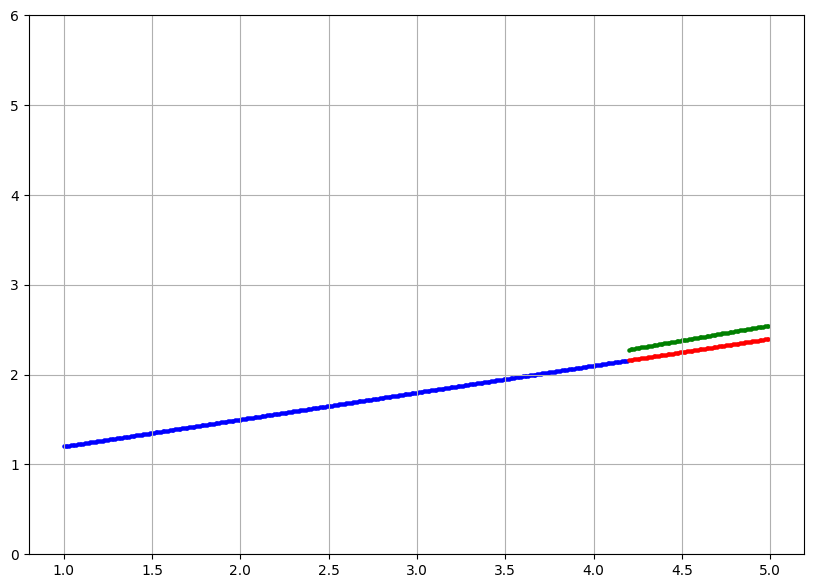

In [128]:
y_preds_np = y_preds.detach().cpu().numpy()
plot_prediction(prediction=y_preds_np)


# Save

In [132]:
from pathlib import Path
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

MODEL_NAME = "Exercise1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving to {MODEL_SAVE_PATH}")
torch.save(model.state_dict(),
           f = MODEL_SAVE_PATH)

Saving to Models/Exercise1.pth


# Load Model

In [136]:
Loaded_Model = LinearRegressionModel()

Loaded_Model.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

Loaded_Model.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [138]:
Loaded_Model.eval()

with torch.inference_mode():
  Loaded_Model_preds = Loaded_Model(X_test)

In [139]:
y_preds == Loaded_Model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        